# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [23]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city + "&appid=" + weather_api_key + "&units=metric"
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | granville
Processing Record 3 of Set 1 | kutum
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | marawi
Processing Record 9 of Set 1 | amahai
Processing Record 10 of Set 1 | wufeng
Processing Record 11 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | marcona
City not found. Skipping...
Processing Record 14 of Set 1 | yarim
Processing Record 15 of Set 1 | lac du bonnet
Processing Record 16 of Set 1 | berlevag
Processing Record 17 of Set 1 | goundam
Processing Record 18 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 1 | westpunt
City not found. Skipping...
Processing Record 20 of Set 1 | helena


In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nikolskoye,59.7035,30.7861,1.62,93,100,3.53,RU,2023-02-08 21:10:19
1,granville,-33.8333,151.0167,21.88,93,75,3.09,AU,2023-02-08 21:16:19
2,kutum,14.2000,24.6667,13.42,15,26,3.93,SD,2023-02-08 21:16:21
3,punta arenas,-53.1500,-70.9167,15.06,67,100,13.89,CL,2023-02-08 21:08:01
4,port alfred,-33.5906,26.8910,19.54,95,100,0.45,ZA,2023-02-08 21:08:50


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikolskoye,59.7035,30.7861,1.62,93,100,3.53,RU,2023-02-08 21:10:19
1,granville,-33.8333,151.0167,21.88,93,75,3.09,AU,2023-02-08 21:16:19
2,kutum,14.2000,24.6667,13.42,15,26,3.93,SD,2023-02-08 21:16:21
3,punta arenas,-53.1500,-70.9167,15.06,67,100,13.89,CL,2023-02-08 21:08:01
4,port alfred,-33.5906,26.8910,19.54,95,100,0.45,ZA,2023-02-08 21:08:50


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

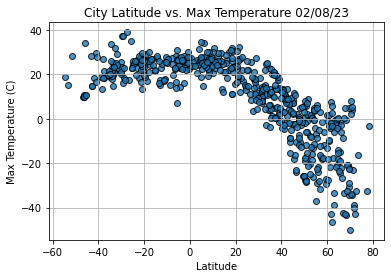

In [29]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
maxtemp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
windspeed = city_data_df["Wind Speed"]
plt.scatter(lats, maxtemp, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

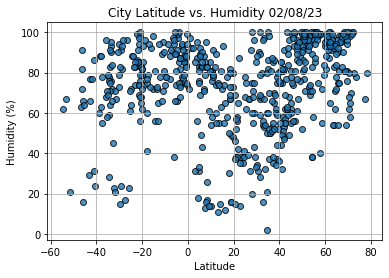

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

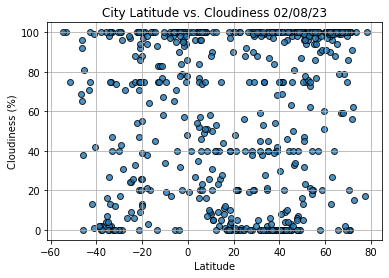

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,cloudiness,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

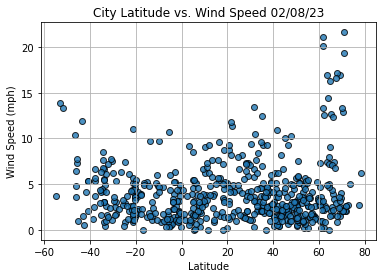

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, windspeed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(ylab)
    plt.show()  


In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
city_data_df["Lat"] >= 0
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikolskoye,59.7035,30.7861,1.62,93,100,3.53,RU,2023-02-08 21:10:19
2,kutum,14.2000,24.6667,13.42,15,26,3.93,SD,2023-02-08 21:16:21
6,jamestown,42.0970,-79.2353,7.79,53,0,2.24,US,2023-02-08 21:08:39
7,marawi,7.9986,124.2928,19.36,95,100,0.32,PH,2023-02-08 21:09:46
9,wufeng,27.4500,104.8333,3.29,91,100,1.60,CN,2023-02-08 21:16:24


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,granville,-33.8333,151.0167,21.88,93,75,3.09,AU,2023-02-08 21:16:19
3,punta arenas,-53.1500,-70.9167,15.06,67,100,13.89,CL,2023-02-08 21:08:01
4,port alfred,-33.5906,26.8910,19.54,95,100,0.45,ZA,2023-02-08 21:08:50
5,busselton,-33.6500,115.3333,14.52,90,2,4.90,AU,2023-02-08 21:08:42
8,amahai,-3.3333,128.9167,25.77,82,100,3.98,ID,2023-02-08 21:16:23


###  Temperature vs. Latitude Linear Regression Plot

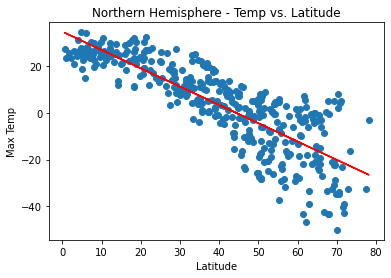

In [36]:
# Linear regression on Northern Hemisphere
xval = northern_hemi_df["Lat"]
yval = northern_hemi_df["Max Temp"]
# Call the function.
linreg(xval, yval,'Northern Hemisphere - Temp vs. Latitude','Max Temp',(10,40))


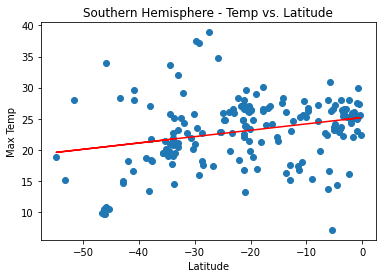

In [37]:
# Linear regression on Southern Hemisphere
xval = southern_hemi_df["Lat"]
yval = southern_hemi_df["Max Temp"]
# Call the function.
linreg(xval, yval,'Southern Hemisphere - Temp vs. Latitude','Max Temp',(-50,90))

**Discussion about the linear relationship:** I see a positive correlation between latitude and max temp. As the latitude increases, the max temp increases with some outliers thrown in the mix.

### Humidity vs. Latitude Linear Regression Plot

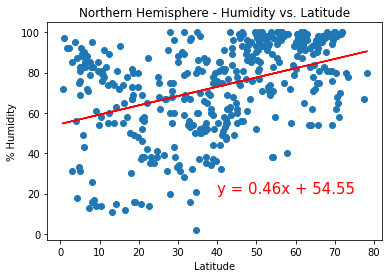

In [38]:
# Northern Hemisphere
xval = northern_hemi_df["Lat"]
yval = northern_hemi_df["Humidity"]
linreg(xval,yval,"Northern Hemisphere - Humidity vs. Latitude","% Humidity",(40,20))

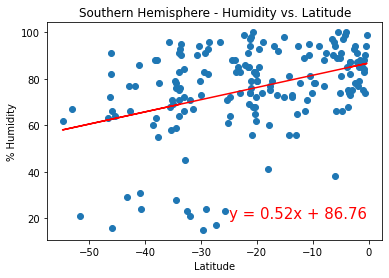

In [39]:
# Southern Hemisphere
xval = southern_hemi_df["Lat"]
yval = southern_hemi_df["Humidity"]
linreg(xval,yval,"Southern Hemisphere - Humidity vs. Latitude","% Humidity",(-25,20))

**Discussion about the linear relationship:** It appears that the relationship is loosely trending upwards. As latitude increases, so does humidity.

### Cloudiness vs. Latitude Linear Regression Plot

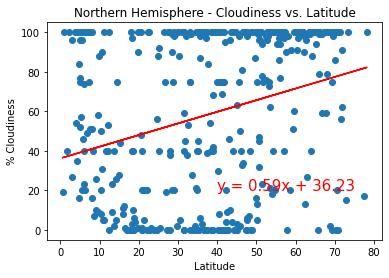

In [40]:
# Northern Hemisphere
xval = northern_hemi_df["Lat"]
yval = northern_hemi_df["Cloudiness"]
linreg(xval,yval,"Northern Hemisphere - Cloudiness vs. Latitude","% Cloudiness",(40,20))

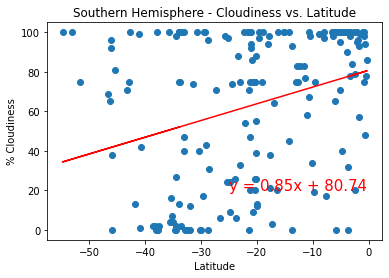

In [41]:
# Southern Hemisphere
xval = southern_hemi_df["Lat"]
yval = southern_hemi_df["Cloudiness"]
linreg(xval,yval,"Southern Hemisphere - Cloudiness vs. Latitude","% Cloudiness",(-25,20))

**Discussion about the linear relationship:** While an equation has been calculated for the regression, I do not see a severe relationship between cloudiness and latitude. However, there is slight correlation as you can see the cloudiness percentage is closer to 100 as the latitude increases.

### Wind Speed vs. Latitude Linear Regression Plot

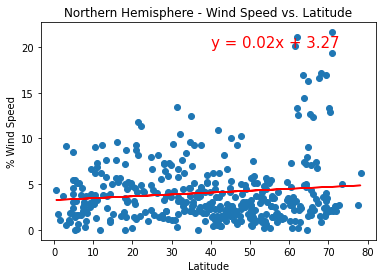

In [42]:
# Northern Hemisphere
xval = northern_hemi_df["Lat"]
yval = northern_hemi_df["Wind Speed"]
linreg(xval,yval,"Northern Hemisphere - Wind Speed vs. Latitude","% Wind Speed",(40,20))

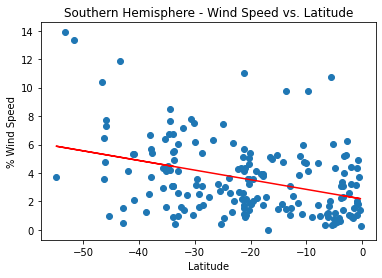

In [43]:
# Southern Hemisphere
xval = southern_hemi_df["Lat"]
yval = southern_hemi_df["Wind Speed"]
linreg(xval,yval,"Southern Hemisphere - Wind Speed vs. Latitude","% Wind Speed",(-25,20))

**Discussion about the linear relationship:** There is a negative correlation between wind speed and latitude as shown by the plot. As latitude increases wind speed decreases.